# Algoritmos de Agrupamento e Classificação de Dados

## Introdução
Este notebook aborda dois algoritmos fundamentais em análise de dados:

1. **Regressão Linear** - Um modelo supervisionado para prever valores contínuos.
2. **K-Médias (K-Means)** - Um algoritmo não supervisionado para agrupamento de dados.

## 1. Regressão Linear

### 1.1. Conceito
A Regressão Linear é um método estatístico usado para modelar a relação entre uma variável dependente (variável de resposta) e uma ou mais variáveis independentes (variáveis preditoras). Ela busca encontrar a melhor linha reta (ou hiperplano em dimensões superiores) que minimiza a soma dos erros ao quadrado entre os valores observados e os valores previstos.

#### Tipos de Regressão Linear:
- **Simples:** Envolve uma variável independente.
- **Múltipla:** Envolve duas ou mais variáveis independentes.

A equação da Regressão Linear pode ser expressa como:
![equação](https://image3.slideserve.com/6062921/modelo-de-regress-o-linear-l.jpg)

O objetivo é minimizar a soma dos quadrados dos erros (MSE - Mean Squared Error) para determinar os melhores valores para \(\beta\).

### 1.2. Exemplo Prático
Antes de iniciar este exemplo, esperamos demonstrar como a Regressão Linear pode ser utilizada para prever os valores dos imóveis no dataset Boston Housing (disponível em `sklearn.datasets`). Ao final, avaliaremos a precisão do modelo através do Erro Quadrático Médio e visualizaremos as previsões em relação aos valores reais.

In [1]:
# instalação das bibliotecas
!pip install pandas numpy scikit-learn seaborn

Erro Quadrático Médio: 0.5558915986952444


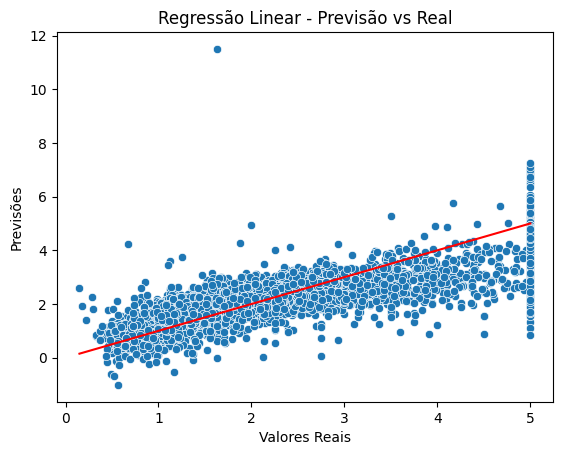

In [7]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio: {mse}")

# Visualizar a relação entre variáveis
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Linear - Previsão vs Real")
plt.show()

## 2. K-Médias (K-Means)

### 2.1. Conceito
O K-Médias é um algoritmo de aprendizado não supervisionado usado para agrupar dados em \(k\) clusters distintos. Ele funciona iterativamente para:

1. Inicializar \(k\) centróides (aleatórios ou baseados em alguma estratégia).
2. Atribuir cada ponto de dado ao centróide mais próximo (usando uma métrica de distância, como Euclidiana).
3. Atualizar os centróides calculando a média dos pontos atribuídos a cada cluster.
4. Repetir os passos 2 e 3 até que os centróides não mudem significativamente ou o número máximo de iterações seja atingido.

#### Aplicações Comuns:
- Segmentação de clientes.
- Compressão de imagens.
- Análise de agrupamentos em biologia, marketing, etc.

### 2.2. Exemplo Prático
Neste exemplo, utilizaremos o algoritmo K-Médias para agrupar os dados do dataset Iris em três clusters, correspondendo aproximadamente às três espécies de flores presentes no dataset. Também utilizaremos a técnica PCA para reduzir a dimensionalidade e facilitar a visualização dos clusters gerados.
Usaremos o dataset "Iris" (disponível em `sklearn.datasets`).

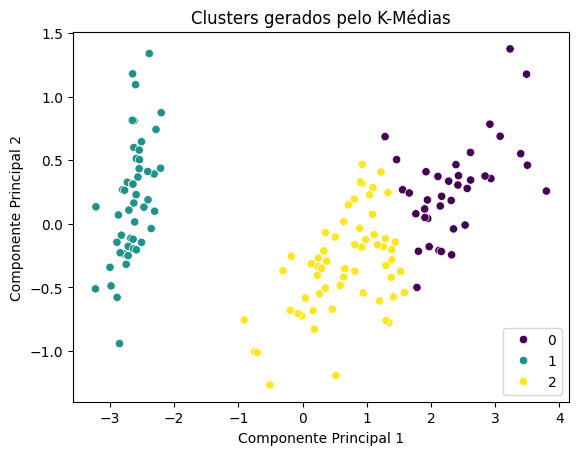

In [10]:
# Importar bibliotecas necessárias
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregar o dataset Iris
data = load_iris()
X = data.data

# Aplicar o K-Médias
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Reduzir dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar os clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title("Clusters gerados pelo K-Médias")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

### 2.3. Exemplo Prático com Imagem
Neste exemplo, usaremos o K-Médias para reduzir as cores de uma imagem. Configuraremos a URL da imagem e o número de cores \(k\) a serem usadas. O objetivo é exibir a imagem original e a versão reduzida em cores, mostrando a economia de bytes obtida.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tamanho original: 15129.00 KB (sem nenhum tipo de compressão)
Tamanho comprimido: 630.38 KB (compressão da cor)
A imagem comprimida é 4.17% do tamanho da original


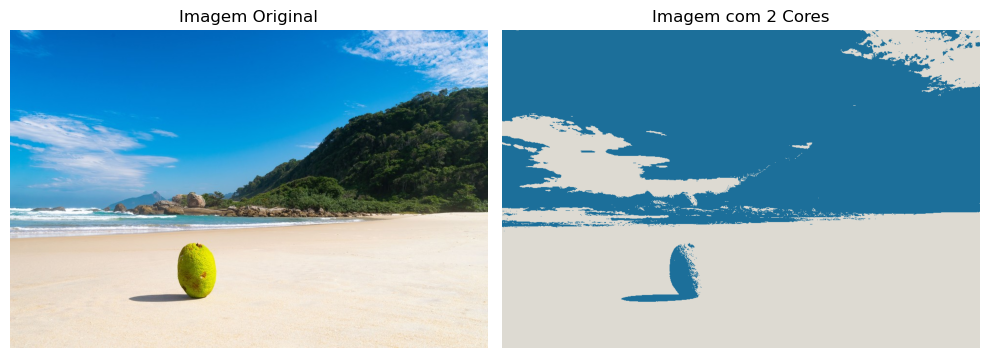

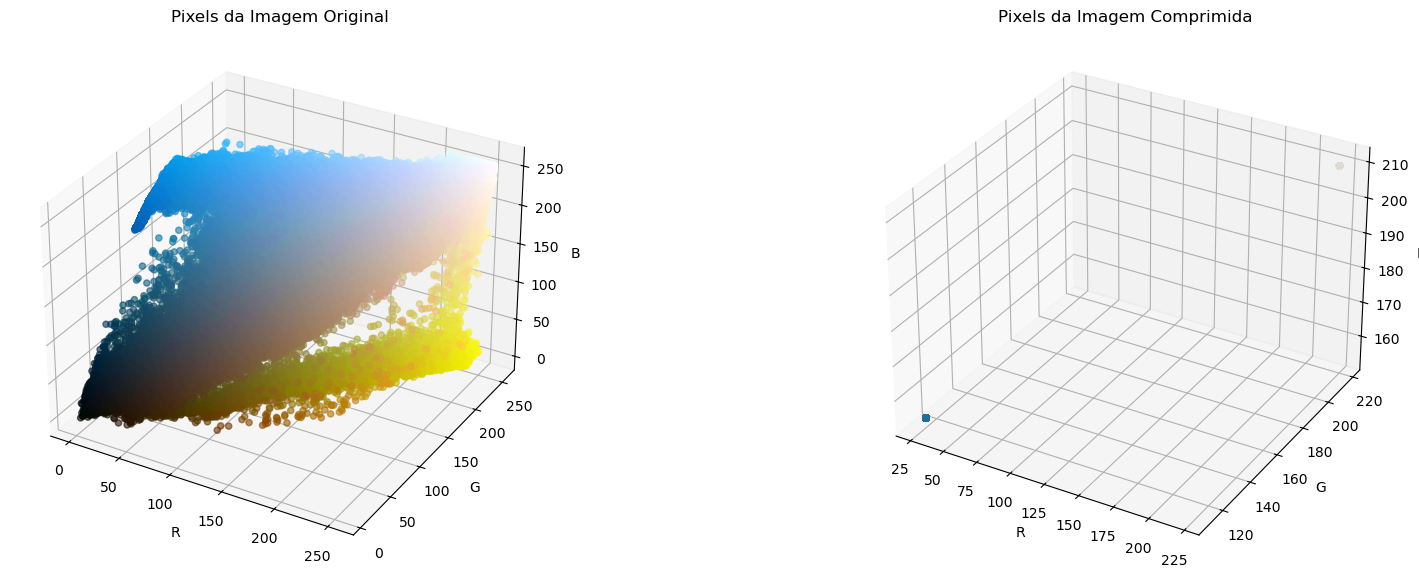

In [2]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from sklearn.cluster import KMeans
import math

# Configurar parâmetros
#image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"  # URL da imagem
image_url = "https://s2-casavogue.glbimg.com/YKjCtR8d9N62JhaPVBJmR56qVY8=/0x0:4088x2725/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_d72fd4bf0af74c0c89d27a5a226dbbf8/internal_photos/bs/2024/e/l/wRWga5RLC7eiTW31N3xg/melhores-praias-do-brasil-praia-de-lopes-mendes.jpg"  # URL da imagem
n_colors = 2  # Número de cores desejadas

# Carregar a imagem
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert("RGB")
    return np.array(img)

image = load_image_from_url(image_url)
original_shape = image.shape

# Redimensionar a imagem para um vetor de pixels
pixels = image.reshape(-1, 3)

# Aplicar o K-Médias
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(pixels)
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
compressed_image = compressed_pixels.reshape(original_shape)

# Comparar tamanhos
original_size_kb = len(pixels) * (3*8) / 1024  # (3 bytes por pixel, cada pixel são 8 bits)
compressed_size_kb = (len(compressed_pixels) * math.ceil(math.log2(n_colors))) / 1024  # Tamanho comprimido em kilobytes
compression_ratio = compressed_size_kb / original_size_kb

print(f"Tamanho original: {original_size_kb:.2f} KB (sem nenhum tipo de compressão)")
print(f"Tamanho comprimido: {compressed_size_kb:.2f} KB (compressão da cor)")
print(f"A imagem comprimida é {compression_ratio:.2%} do tamanho da original")

# Exibir as imagens
plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagem Original")
plt.axis("off")

# Imagem comprimida
plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Imagem com {n_colors} Cores")
plt.axis("off")

plt.tight_layout()
plt.show()

# Gráfico 3D dos pixels no espaço RGB
fig = plt.figure(figsize=(20, 7))

# Pixels da imagem original
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='o', alpha=0.6)
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
ax1.set_title("Pixels da Imagem Original")

# Pixels da imagem comprimida
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(compressed_pixels[:, 0], compressed_pixels[:, 1], compressed_pixels[:, 2], c=compressed_pixels / 255.0, marker='o', alpha=0.6)
ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.set_title("Pixels da Imagem Comprimida")

plt.show()